# Chapra Ch.7 PROBLEM 7.39

위쪽 삼각형의 빗변 길이:

$$
\frac{d}{L_1} = \cos{x}
$$

$$
\frac{L_1}{d} = \frac{1}{\cos{x}}
$$

$$
L_1 = \frac{d}{\cos{x}}
$$
아래쪽 삼각형의 빗변 길이:

$$
\frac{h}{L_2} = \sin{x}
$$

$$
\frac{L_2}{h} = \frac{1}{\sin{x}}
$$

$$
L_2 = \frac{h}{\sin{x}}
$$
길이 최소화 식:

$$
\min_{x} L_1 + L_2 = \frac{d}{\cos{x}} + \frac{h}{\sin{x}}, \quad (0<x<\pi/2)
$$

직각삼각형의 한 각의(오른쪽 아래 모서리, 위아래 동일) 최대 각도는 $\pi - \frac{\pi}{2} = \frac{\pi}{2}$로 제한

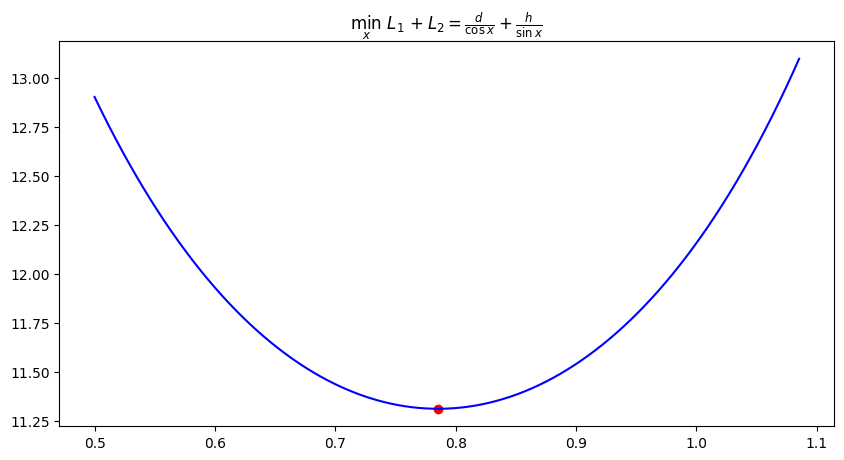

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def L(x):
    return 4/np.cos(x) + 4/np.sin(x)
x = np.linspace(0.5, np.pi/4 + 0.3, 1000)

plt.figure(figsize=(10,5))
plt.plot(x, L(x), c='b')
plt.scatter(x=np.pi/4, y=L(np.pi/4), c='r')
plt.title(r'$\min_{x}\ L_1 + L_2 = \frac{d}{\cos{x}} + \frac{h}{\sin{x}}$')
plt.show()

## C 코드

```C
#include <stdio.h>
#include <math.h>

#define func(x) (4/cos(x) + 4/sin(x))

main ()
{
	
	FILE *out1;
	out1=fopen("extreme value (golden section search)_(Chapra 7.39).dat","w");

    int imax,iter;
    double xa,xb,xc,xd,xm,l_golden,fxa,fxb,fxc,fxd,fxm;
    double k_golden,epsil,res;
    
    epsil = 0.000000000001;
	imax=1000;
    k_golden=(sqrt(5.0)+1.0)/(sqrt(5.0)+3.0);
    
    xa= 0.0;
	xb= M_PI/2;
	
	fxa=func(xa);
	fxb=func(xb);
	
    for(iter=1;iter<imax;++iter)
       {
       	l_golden=k_golden*fabs(xb-xa);
       	
       	xd=xa+l_golden;    /*   x1   */
       	xc=xb-l_golden;    /*   x2   */
       	xm=(xd+xc)/2.0;
       	
       	fxd=func(xd);
       	fxc=func(xc);
       	fxm=(fxd+fxc)/2.0;
       	
       	res=fabs(fxd-fxc);
       	
       	fprintf(out1,"#iter%d, xm = %f, res = %f, extreme = %f \n"
		            ,iter,xm,res,fxm);
       	       	      	
       	if(res<epsil)
       	{
       		fprintf(out1," \n\n");
			fprintf(out1,"xm = %f, extreme value = %f \n", xm,fxm);
			goto END;
       		
		}
				          	
       	if((fxc)<(fxd)) /* high --> fxc > fxd and low --> fxc < fxd */       	                
       	{
            xb=xd;
		}
		
		else
		{
		    xa=xc;
		}
				
	   }
	   
	END:;
		
	
	fclose(out1);
}
```

## 결과 파일

```C
#iter1, xm = 0.785398, res = 0.000000, extreme = 11.930707 
 

xm = 0.785398, extreme value = 11.930707 
```

피타고라스 정리에 따라, 두 직각삼각형의 빗변의 길이가 최소가 되는 각도는 $45^{\circ}=\frac{\pi}{4}$이다.